# Get PASTIS modes

## --- LUVOIR A --

We will now perform a singular value decomposition (SVD) on the PASTIS matrix to get the PASTIS modes and save them.

I started working on the stability calculations in here too, but I will expand on that (and do it properly) in notebook 11.

In [3]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from astropy.io import fits
import astropy.units as u
import hcipy as hc
from hcipy.optics.segmented_mirror import SegmentedMirror

os.chdir('../../pastis/')
from e2e_simulators.luvoir_imaging import LuvoirAPLC

In [4]:
# Which directory are we working in?
savedpath = '/Users/pueyo/Documents/data_from_repos/pastis_data/2020-05-07T10-55-02_luvoir-medium'   # large apodizer LUVOIR

## Read the matrix

It's your choice wheter you read the analytical or numerical matrix.

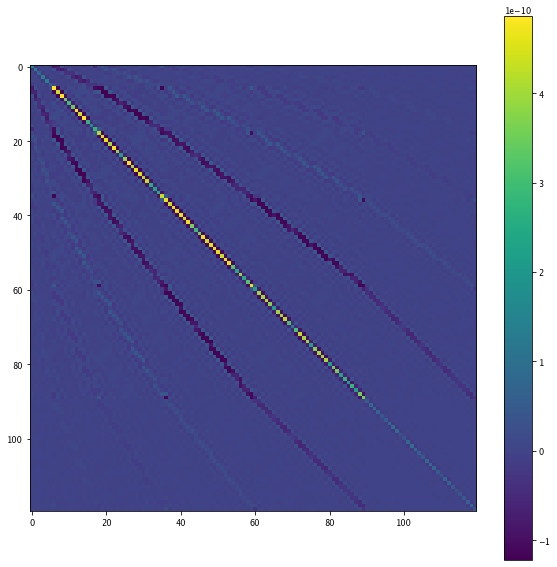

In [5]:
matrix = fits.getdata(os.path.join(savedpath, 'matrix_numerical', 'PASTISmatrix_num_piston_Noll1.fits'))

plt.figure(figsize=(10, 10))
plt.imshow(matrix)
plt.colorbar()

## Get eigenmodes and eigenvalues

We should actually be using an SVD, which I do at the end of this notebook.

In [6]:
evals, evecs = np.linalg.eig(matrix)

In [7]:
# Hack to use SVD modes instead
#evals = s
#evecs = u

In [8]:
print('evals.shape: {}'.format(evals.shape))
print('evals:\n{}'.format(evals))

evals.shape: (120,)
evals:
[1.01077637e-09 1.00272204e-09 9.88559822e-10 9.71792835e-10
 8.93678018e-10 8.65489916e-10 7.82953877e-10 7.53652839e-10
 7.43496162e-10 7.31229747e-10 7.22350082e-10 6.94658202e-10
 6.87906913e-10 6.60311248e-10 6.20142955e-10 6.09548018e-10
 5.93681386e-10 5.71654607e-10 5.67339927e-10 5.53397348e-10
 5.31342908e-10 5.32130720e-10 5.10069928e-10 5.02526350e-10
 4.94174664e-10 4.89933581e-10 4.60620162e-10 4.54778792e-10
 4.52818277e-10 4.36591764e-10 4.33507304e-10 4.25415094e-10
 4.05983785e-10 3.97242862e-10 3.91641784e-10 3.82261167e-10
 3.75312405e-10 3.70903570e-10 3.59393368e-10 3.51256767e-10
 3.48664796e-10 3.44450687e-10 3.31228181e-10 3.27845018e-10
 3.19195621e-10 3.25019567e-10 3.04910071e-10 3.02426179e-10
 3.00745611e-10 2.80124204e-10 2.73892979e-10 2.74402945e-10
 2.47656621e-10 2.42779296e-10 2.40131377e-10 2.30086299e-10
 2.26131977e-10 2.13253474e-10 2.05263979e-10 1.82956471e-10
 1.92480297e-10 1.91616269e-10 1.74155521e-10 1.72869947e-

In [9]:
print('evecs.shape: {}'.format(evecs.shape))
#print('evecs:\n{}'.format(evecs))

evecs.shape: (120, 120)


Which dimension are the eigenvectors in?

We know

$$M \cdot u = \lambda \cdot u$$

so we can test this.

In [10]:
# Evaluate left and right side of eigenvalue problem for mode number n
n = 17

left = np.dot(matrix, evals[n])
right = np.dot(matrix, evecs[:, n])

# Compare them
print('Are the left and right side the same:')
print(np.allclose(left, right))

Are the left and right side the same:
True


In [13]:
evecs.shape

(120, 120)

### Sort from lowest to highest eigenvalue

Sorted evals:
[6.50265631e-14 3.28589938e-12 3.87866971e-12 9.89054311e-12
 1.03312484e-11 1.54203628e-11 1.78139333e-11 2.02597421e-11
 2.13335398e-11 2.32797059e-11 2.55331246e-11 2.62230311e-11
 2.72256354e-11 2.90978220e-11 2.97964733e-11 3.19327700e-11
 3.36059204e-11 3.91866209e-11 3.95058144e-11 4.08848600e-11
 4.12952728e-11 4.49642147e-11 4.65897648e-11 4.84434159e-11
 5.26172792e-11 5.39506430e-11 5.75268709e-11 6.57322521e-11
 6.83892506e-11 6.96191289e-11 6.96798536e-11 7.00917359e-11
 7.26815357e-11 7.45693656e-11 7.93285737e-11 8.12408497e-11
 8.35703454e-11 8.63386181e-11 8.97445257e-11 9.10987403e-11
 1.00587312e-10 1.00632233e-10 1.00996103e-10 1.02457507e-10
 1.06172961e-10 1.06221820e-10 1.11820286e-10 1.20331734e-10
 1.23474482e-10 1.32920666e-10 1.35047463e-10 1.45427633e-10
 1.53870205e-10 1.54475861e-10 1.59124005e-10 1.72869947e-10
 1.74155521e-10 1.77231391e-10 1.82956471e-10 1.91616269e-10
 1.92480297e-10 2.05263979e-10 2.13253474e-10 2.26131977e-10
 2.3008629

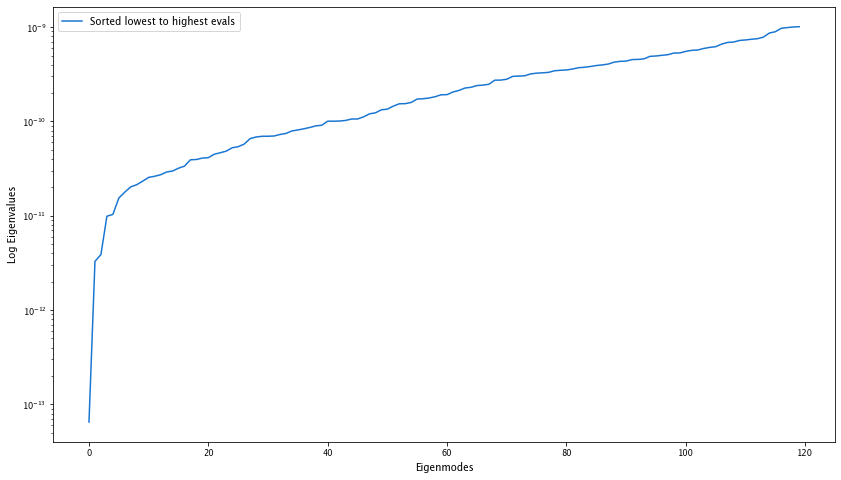

In [14]:
# Sort them
sorted_evals = np.sort(evals)
sorted_indices = np.argsort(evals)
sorted_evecs = evecs[:, sorted_indices]

print('Sorted evals:')
print(sorted_evals)
#np.savetxt(os.path.join(savedpath, 'results', 'eigenvalues.txt'), sorted_evals)
#np.savetxt(os.path.join(savedpath, 'results', 'eigenvectors.txt'), sorted_evecs)

plt.figure(figsize=(14, 8))
#plt.plot(evals, label='Unsorted from eigendecomposition')
plt.plot(sorted_evals, label='Sorted lowest to highest evals')
plt.semilogy()
plt.xlabel('Eigenmodes')
plt.ylabel('Log Eigenvalues')
plt.legend()
#plt.savefig(os.path.join(savedpath, 'results', 'LUVOIR_eigenvals.pdf'))

## Mode display

Instead of using the `SegmentedTelescopeAPLC` class to display the modes, which would require us to load andn create all the files needed for the APLC propagation, we will simply use a `SegmentedMirror`.

In [16]:
# Load aperture files needed for SM
nseg = 120
wvln = 638e-9

datadir = '/Users/pueyo/PythonPackages/PASTIS/LUVOIR_delivery_May2019/'
aper_path = 'inputs/TelAp_LUVOIR_gap_pad01_bw_ovsamp04_N1000.fits'
aper_ind_path = 'inputs/TelAp_LUVOIR_gap_pad01_bw_ovsamp04_N1000_indexed.fits'
aper_read = hc.read_fits(os.path.join(datadir, aper_path))
aper_ind_read = hc.read_fits(os.path.join(datadir, aper_ind_path))

pupil_grid = hc.make_pupil_grid(dims=aper_ind_read.shape[0], diameter=15)
aper = hc.Field(aper_read.ravel(), pupil_grid)
aper_ind = hc.Field(aper_ind_read.ravel(), pupil_grid)

wf_aper = hc.Wavefront(aper, wvln)

# Load segment positions from fits header
hdr = fits.getheader(os.path.join(datadir, aper_ind_path))

poslist = []
for i in range(nseg):
    segname = 'SEG' + str(i+1)
    xin = hdr[segname + '_X']
    yin = hdr[segname + '_Y']
    poslist.append((xin, yin))
    
poslist = np.transpose(np.array(poslist))
seg_pos = hc.CartesianGrid(poslist)

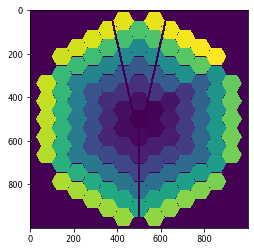

In [21]:
plt.imshow(aper_ind_read)

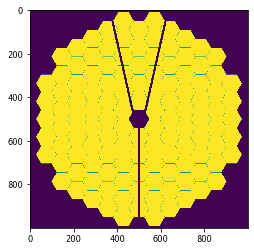

In [19]:
plt.imshow(aper_read)

In [24]:
seg_pos.coords.shape

(2, 120)

In [42]:
# Instantiate SM
sm = SegmentedMirror(aper_ind, seg_pos)

In [60]:
sm

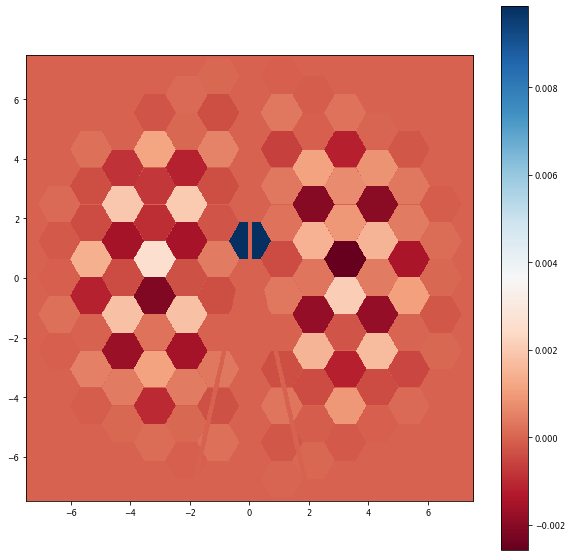

In [61]:
sm.set_segment(2+1,0.000000001/2,0, 0)
wf_sm = sm(wf_aper)
plt.figure(figsize=(10, 10))
hc.imshow_field(wf_sm.phase, cmap='RdBu')
plt.colorbar()

In [ ]:
#((0.000001*sorted_evecs[:, mode]*(2*np.pi/638e-9)+np.pi)%(2*np.pi))-(np.pi)  # testing with Lucie

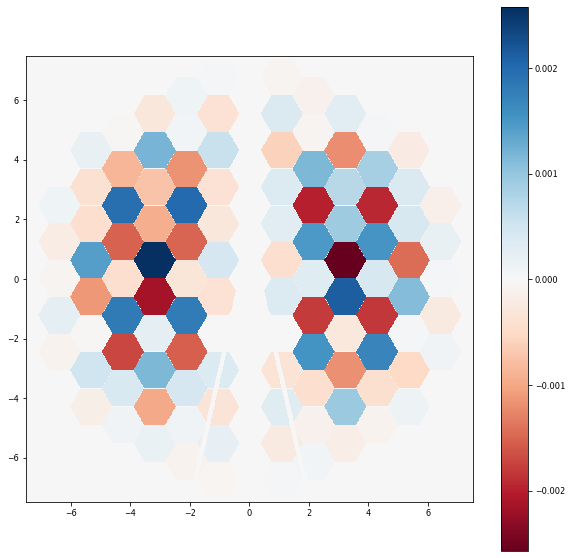

In [45]:
mode = 119   # We start numbering at 0 here, 0-35 (Python nunmbering!)

sm.flatten()
for seg, val in enumerate(sorted_evecs[:, mode]):
    #print(val)
    sm.set_segment(seg+1,0.000000001*val/2, 0, 0)

# Propagate WF and display SM phase
wf_sm = sm(wf_aper)

plt.figure(figsize=(10, 10))
hc.imshow_field(wf_sm.phase, cmap='RdBu')
plt.colorbar()

In [47]:
# Lets compute all modes now for LUVOIR with an HCIPy SM
luvoir_modes = []

for mode in range(len(evals)):
    print('Working on mode {}/{}.'.format(mode+1, len(evals)))
    
    sm.flatten()
    for seg, val in enumerate(sorted_evecs[:, mode]):
        #print(val)
        sm.set_segment(seg+1, 0.000000001*val/2, 0, 0)
        
    wf_sm = sm(wf_aper)
    luvoir_modes.append(wf_sm.phase)

Working on mode 1/120.
Working on mode 2/120.
Working on mode 3/120.
Working on mode 4/120.
Working on mode 5/120.
Working on mode 6/120.
Working on mode 7/120.
Working on mode 8/120.
Working on mode 9/120.
Working on mode 10/120.
Working on mode 11/120.
Working on mode 12/120.
Working on mode 13/120.
Working on mode 14/120.
Working on mode 15/120.
Working on mode 16/120.
Working on mode 17/120.
Working on mode 18/120.
Working on mode 19/120.
Working on mode 20/120.
Working on mode 21/120.
Working on mode 22/120.
Working on mode 23/120.
Working on mode 24/120.
Working on mode 25/120.
Working on mode 26/120.
Working on mode 27/120.
Working on mode 28/120.
Working on mode 29/120.
Working on mode 30/120.
Working on mode 31/120.
Working on mode 32/120.
Working on mode 33/120.
Working on mode 34/120.
Working on mode 35/120.
Working on mode 36/120.
Working on mode 37/120.
Working on mode 38/120.
Working on mode 39/120.
Working on mode 40/120.
Working on mode 41/120.
Working on mode 42/120.
W

### Saving stuff

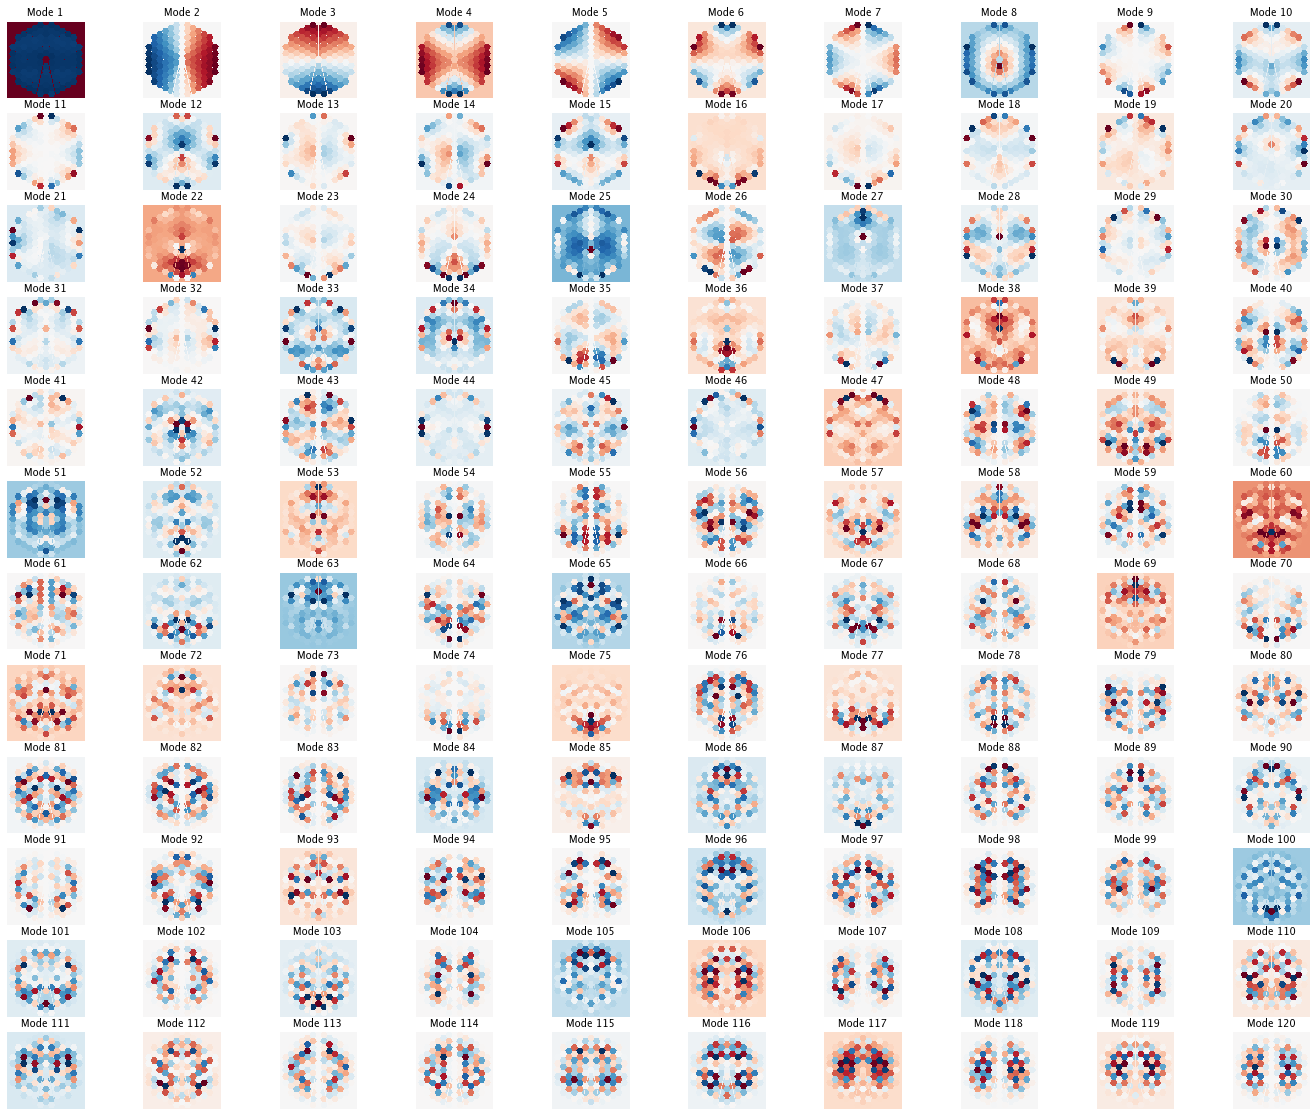

In [27]:
# Plot them all
pmin = -5e-7
pmax = 5e-7

plt.figure(figsize=(24, 20))
for mode in range(len(evals)):
    
    plt.subplot(12, 10, mode+1)
    hc.imshow_field(luvoir_modes[mode], cmap='RdBu')#, vmin=pmin, vmax=pmax)
    #plt.colorbar()
    plt.axis('off')
    plt.title('Mode ' + str(mode+1))
    
#plt.savefig(os.path.join(savedpath, 'results', 'LUVOIR_modes_piston.pdf'))

All done.


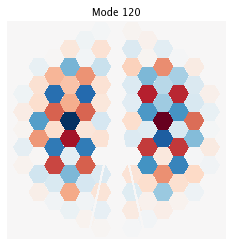

In [28]:
# Save them all to fits and PDF
all_modes = []   # to save as a cube

for mode in range(len(evals)):
    
    # fits
    #hc.write_fits(luvoir_modes[mode], os.path.join(savedpath, 'results', 'modes', 'fits', 'mode'+str(mode+1)+'.fits'))
    all_modes.append(luvoir_modes[mode].shaped)
    
    # pdf
    plt.clf()
    hc.imshow_field(luvoir_modes[mode], cmap='RdBu')
    plt.axis('off')
    plt.title('Mode ' + str(mode+1))
    #plt.savefig(os.path.join(savedpath, 'results', 'modes', 'pdf', 'mode'+str(mode+1)+'.pdf'))
    
# fits cube
all_modes = np.array(all_modes)
#hc.write_fits(all_modes, os.path.join(savedpath, 'results', 'modes', 'fits', 'cube_modes.fits'))
    
print('All done.')

### Do it with an SVD

`u` is holding all the modes in the form of `u[segment, mode]`. `s` holds all the singular values.

In [29]:
u, s, vh = np.linalg.svd(matrix, full_matrices=True)

In [30]:
print(s)

[1.01077637e-09 1.00272204e-09 9.88559822e-10 9.71792835e-10
 8.93678018e-10 8.65489916e-10 7.82953877e-10 7.53652839e-10
 7.43496162e-10 7.31229747e-10 7.22350082e-10 6.94658202e-10
 6.87906913e-10 6.60311248e-10 6.20142955e-10 6.09548018e-10
 5.93681386e-10 5.71654607e-10 5.67339927e-10 5.53397348e-10
 5.32130720e-10 5.31342908e-10 5.10069928e-10 5.02526350e-10
 4.94174664e-10 4.89933581e-10 4.60620162e-10 4.54778792e-10
 4.52818277e-10 4.36591764e-10 4.33507304e-10 4.25415094e-10
 4.05983785e-10 3.97242862e-10 3.91641784e-10 3.82261167e-10
 3.75312405e-10 3.70903570e-10 3.59393368e-10 3.51256767e-10
 3.48664796e-10 3.44450687e-10 3.31228181e-10 3.27845018e-10
 3.25019567e-10 3.19195621e-10 3.04910071e-10 3.02426179e-10
 3.00745611e-10 2.80124204e-10 2.74402945e-10 2.73892979e-10
 2.47656621e-10 2.42779296e-10 2.40131377e-10 2.30086299e-10
 2.26131977e-10 2.13253474e-10 2.05263979e-10 1.92480297e-10
 1.91616269e-10 1.82956471e-10 1.77231391e-10 1.74155521e-10
 1.72869947e-10 1.591240

Text(0.5, 0, 'Eigenmodes')

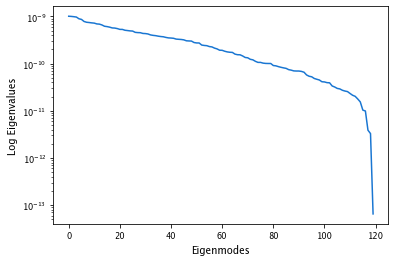

In [31]:
#plt.plot(np.log10(s))
plt.plot(s)
plt.semilogy()
plt.ylabel('Log Eigenvalues')
plt.xlabel('Eigenmodes')

In [32]:
print(s.shape)

(120,)


As opposed to eigenvalues, the singular values are all positive, including the awkward global piston mode, and they're already sorted - **but from highest to lowest**! (opposite of above case)

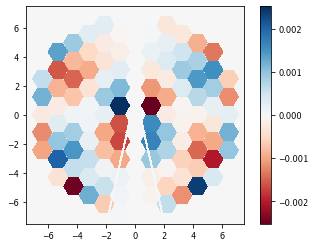

In [35]:
mode = -40   # We start numbering at 0 here, 0-35 (Python nunmbering!)

sm.flatten()
for seg, val in enumerate(u[:, mode]):
    #print(val)
    sm.set_segment(seg+1, 0.000000001*val/2, 0, 0)

# Propagate WF and display SM phase
wf_sm = sm(wf_aper)

hc.imshow_field(wf_sm.phase, cmap='RdBu')
plt.colorbar()

Plot them all because I don't know where the global piston is in the numbering from the SVD.

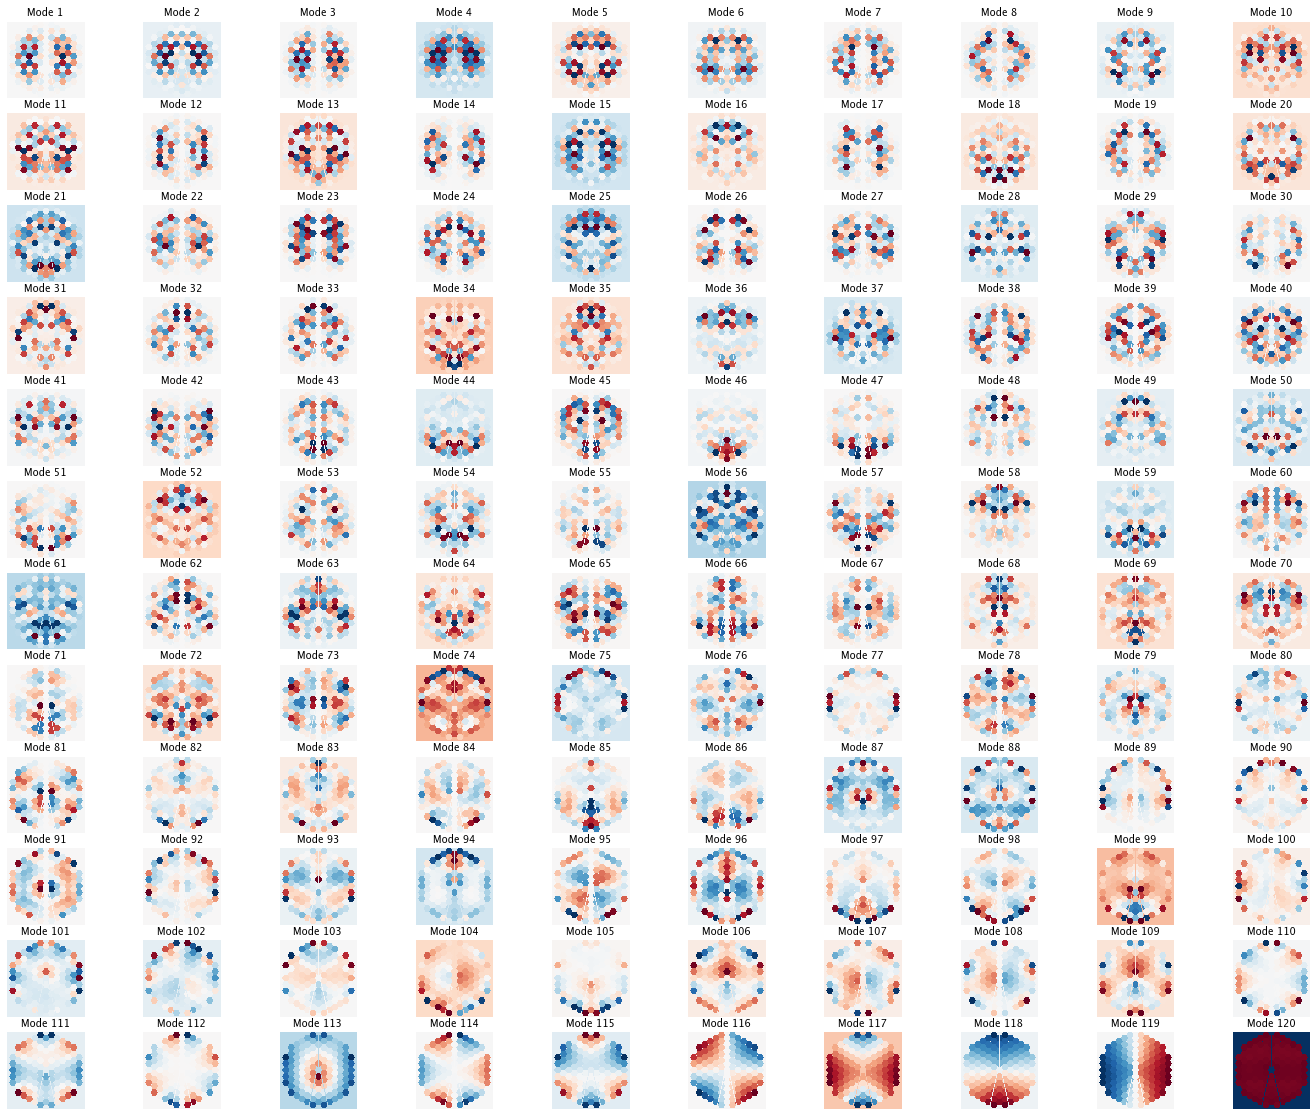

In [36]:
plt.figure(figsize=(24, 20))
for mode in range(len(evals)):
    sm.flatten()
    for seg, val in enumerate(u[:, mode]):
        #print(val)
        sm.set_segment(seg+1, 0.000001*val/2, 0, 0)
        
    wf_sm = sm(wf_aper)
    
    plt.subplot(12, 10, mode+1)
    hc.imshow_field(wf_sm.phase, cmap='RdBu')#, vmin=pmin, vmax=pmax)
    #plt.colorbar()
    plt.axis('off')
    plt.title('Mode ' + str(mode+1))

Why on Earth is the global piston mode number 49 here?

All done.


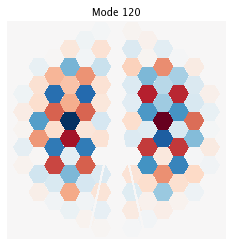

In [38]:
# Save them all to fits and PDF
all_modes = []   # to save as a cube

for mode in range(len(evals)):
    
    # fits
    #hc.write_fits(luvoir_modes[mode], os.path.join(savedpath, 'results', 'modes', 'fits', 'mode'+str(mode+1)+'.fits'))
    all_modes.append(luvoir_modes[mode].shaped)
    
    # pdf
    plt.clf()
    hc.imshow_field(luvoir_modes[mode], cmap='RdBu')
    plt.axis('off')
    plt.title('Mode ' + str(mode+1))
    #plt.savefig(os.path.join(savedpath, 'results', 'modes', 'pdf', 'mode'+str(mode+1)+'.pdf'))
    
# fits cube
all_modes = np.array(all_modes)
#hc.write_fits(all_modes, os.path.join(savedpath, 'results', 'modes', 'fits', 'cube_modes.fits'))
    
print('All done.')